This is the companion Jupyter Notebook of Chapter 2, Postulates of Quantum Mechanics, of the book titled: "Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code" and with ISBN-13: 978-1803243900. Copyright © 2022, Keeper L. Sharkey and Alain Chancé.

The following MIT license only applies to the code, and not to the text and images. The authors are not granting a license to replicate or reuse the text and images in the companion Jupyter notebook.

# MIT License

Copyright (c) 2022 Packt

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.



# 2. Postulates of Quantum Mechanics
“The vivid force of his mind prevailed, and he fared forth far beyond the flaming ramparts of
the heavens and traversed the boundless universe in thought and mind.”
-Titus Lucretius Carus

# Technical requirements
A companion Jupyter notebook for this chapter can be downloaded from GitHub at https://github.com/PacktPublishing/Quantum-Chemistry-and-Computing-for-the-Curious, which has been tested in the Google Colab environment, which is free and runs entirely in the cloud, and in the IBM Quantum Lab environment. Please refer to Appendix B – Leveraging Jupyter Notebooks in the Cloud, for more information. The companion Jupyter notebook automatically installs the following list of libraries:
*  NumPy (Numerical Python) [NumPy], an open-source Python library that is used in almost every field of science and engineering,
*  SymPy, [SymPy] a Python library for symbolic mathematics.
*  Qiskit [Qiskit], an open-source SDK for working with quantum computers at the level of pulses, circuits, and application modules.
*  Qiskit visualization support, to enable use of visualization functionality and Jupyter notebooks.

## Updates
Updates are presented in the following cell at the end of this notebook:
*   Summary of updates V3

## Installing NumPy, SimPy and importing math libraries
### Install NumPy with the following command:

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


### Install SymPy using the following command:

In [2]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


### Import math libraries using the following commands:

In [3]:
import cmath
import math

# 2.1. Postulate 1 - Wave functions

## 2.1.1. Spherical harmonic functions

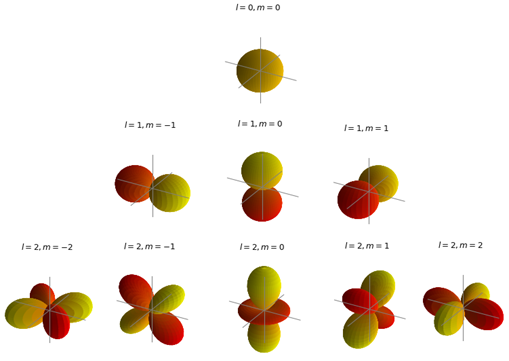

Figure 2.4 – Spatial wave functions of the Hydrogen atom with quantum numbers $l$, $m_l$

### Importing NumPy, SciPy and Matplotlib Python modules



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.special import sph_harm

### Setting-up grids of polar (theta - $\theta$) and azimuthal (phi - $\phi$) angles 

In [5]:
def setup_grid(num=100):
  theta = np.linspace(0, np.pi, num)
  phi = np.linspace(0, 2*np.pi, num)
  # Create a 2D NumPy meshgrid from two 1D arrays of theta, phi coordinates
  theta, phi = np.meshgrid(theta, phi)
  # Compute cartesian coordinates with radius r = 1
  xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])
  return (theta, phi, xyz)

Let’s check the shape of the NumPy arrays returned by setup_grid():

In [6]:
(theta, phi, xyz) = setup_grid()
print("Shape of meshgrid arrays, theta: {}, phi: {}, xyz: {}".format(theta.shape, phi.shape, xyz.shape))

Shape of meshgrid arrays, theta: (100, 100), phi: (100, 100), xyz: (3, 100, 100)


### Coloring the plotted surface of the real functions of the spherical harmonic function (Y)

In [7]:
def colour_plot(ax, Y, Yx, Yy, Yz, cmap):
  # Colour the plotted surface according to the sign of Y.real
  # https://matplotlib.org/stable/gallery/mplot3d/surface3d.html?highlight=surface%20plots
  # https://matplotlib.org/stable/tutorials/colors/colormaps.html
  cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap(cmap))
  cmap.set_clim(-0.5, 0.5)
  ax.plot_surface(Yx, Yy, Yz,
                  facecolors=cmap.to_rgba(Y.real),
                  rstride=2, cstride=2)
  return

### Defining a function that plots a set of x, y, z axes and sets the title of a figure

In [8]:
def draw_axes(ax, ax_lim, title):
  ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
  ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
  ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)

  # Set the limits, set the title and then turn off the axes frame
  ax.set_title(title)
  ax.set_xlim(-ax_lim, ax_lim)
  ax.set_ylim(-ax_lim, ax_lim)
  ax.set_zlim(-ax_lim, ax_lim)
  ax.axis('off')
  return

### Defining a function which computes the real form of the spherical harmonic Y

In [9]:
def comb_Y(l, m, theta, phi):
  Y = sph_harm(abs(m), l, phi, theta)
  if m < 0:
    Y = np.sqrt(2) * (-1)**m * Y.imag
  elif m > 0:
    Y = np.sqrt(2) * (-1)**m * Y.real
  return Y

### Defining a function that displays the spatial wave functions for a range of values of the angular momentum quantum number and the magnetic quantum number

In [10]:
def plot_orbitals(k, cmap = 'autumn'):
  for l in range(0, k+1):
    for m in range(-l, l+1):
      fig = plt.figure(figsize=plt.figaspect(1.))
      (theta, phi, xyz) = setup_grid()
      ax = fig.add_subplot(projection='3d')
      Y = comb_Y(l, m, theta, phi)
      title = r'$l={{{}}}, m={{{}}}$'.format(l, m)
      Yx, Yy, Yz = np.abs(Y) * xyz
      colour_plot(ax, Y, Yx, Yy, Yz, cmap)
      draw_axes(ax, 0.5, title)
      fig_name = 'Hydrogen_l'+str(l)+'_m'+str(m)
      plt.savefig(fig_name)
      plt.show()
  return

## Spatial wave functions of the hydrogen atom

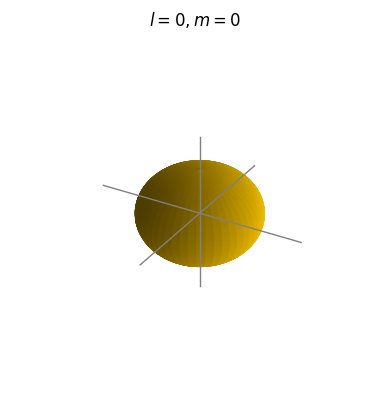

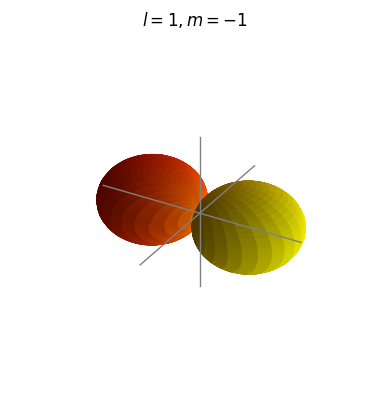

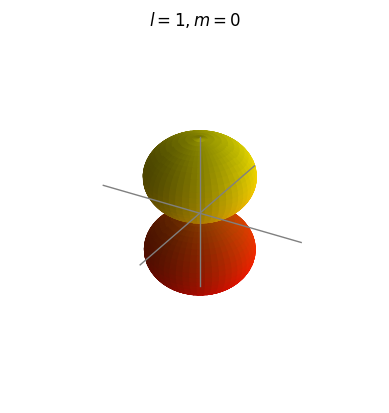

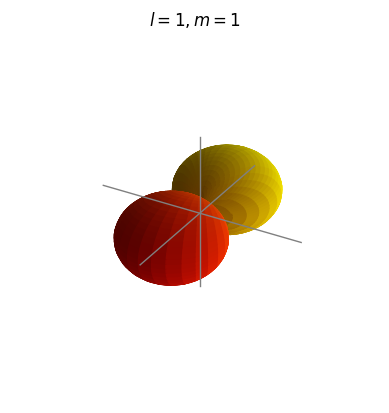

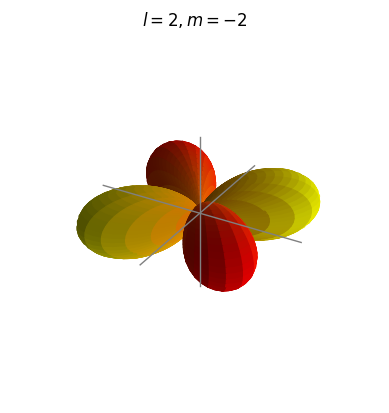

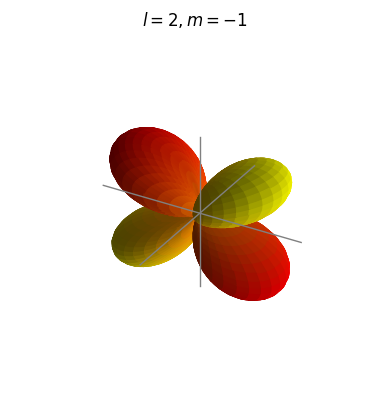

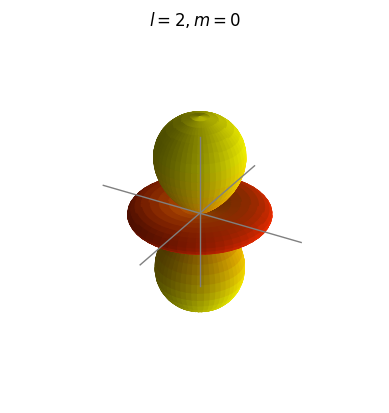

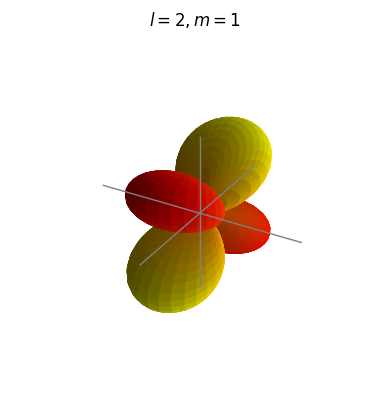

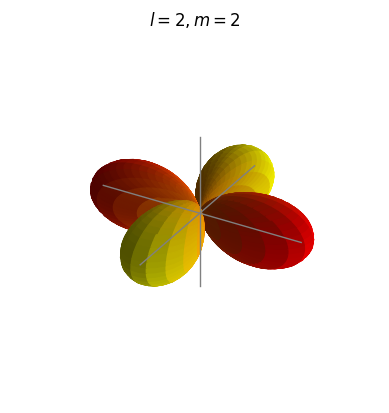

In [11]:
plot_orbitals(2)

### Questions to consider

## 2.1.2. Addition of momenta using Clebsch-Gordan coefficients

In [12]:
import sympy
from sympy import S
from sympy.physics.quantum.cg import CG, cg_simp

### Defining a Clebsch-Gordan coefficient and evaluating its value

#### Fermionic spin pairing to the symmetric state $|s_{1,2}=1, m_{s_{1,2}}=0\rangle$

In [13]:
CG(S(1)/2, S(1)/2, S(1)/2, -S(1)/2, 1, 0).doit()

sqrt(2)/2

In [14]:
CG(S(1)/2, -S(1)/2, S(1)/2, S(1)/2, 1, 0).doit()

sqrt(2)/2

Figure 2.5 – Defining a Clebsch-Gordan coefficient and evaluating its value

#### Fermionic spin pairing to antisymmetric state $(s_{1,2}=0,m_{s_{1,2}}=0)$

In [15]:
CG(S(1)/2, S(1)/2, S(1)/2, -S(1)/2, 0, 0).doit()

sqrt(2)/2

In [16]:
CG(S(1)/2, -S(1)/2, S(1)/2, S(1)/2, 0, 0).doit()

-sqrt(2)/2

Figure 2.6 – Defining a Clebsch-Gordan coefficient and evaluating its value

#### Coupling spin and angular momentum 

In [17]:
CG(1, 0, S(1)/2, S(1)/2, S(1)/2, S(1)/2).doit()

-sqrt(3)/3

In [18]:
CG(1, 1, S(1)/2, -S(1)/2, S(1)/2, S(1)/2).doit()

sqrt(6)/3

In [19]:
CG(1, -1, S(1)/2, S(1)/2, S(1)/2, S(1)/2).doit()

0

Figure 2.7 – Defining a Clebsch-Gordan coefficient and evaluating its value

### Spatial wave functions of different states of the nitrogen atom with 3 $p$ electrons

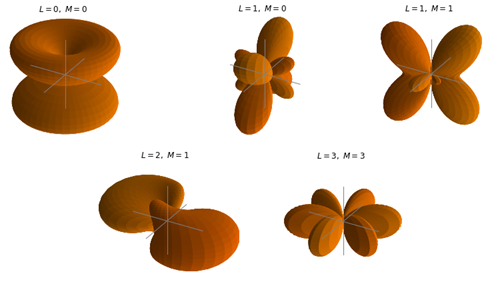

Figure 2.8 – Spatial wave functions of different states of the nitrogen atom with three $p$ electrons

#### Spatial wave function of the ground state of the nitrogen atom with 3 $p$ electrons in $L=0, M=0$
Figure 2.9 – Electron configurations of $L=0, M=0$

#### Setting-up a dictionary of six configuration tuples

In [20]:
T00 = {0: (1,-1, 1,0,  1,-1, 1,1,  0,0), 
       1: (1,-1, 1,1,  1,0,  1,0,  0,0),
       2: (1,0,  1,-1, 1,-1, 1,1,  0,0),
       3: (1,0,  1,1,  1,1,  1,-1, 0,0),
       4: (1,1,  1,-1, 1,0,  1,0,  0,0),
       5: (1,1,  1,0,  1,1,  1,-1, 0,0)}

#### Defining a function which computes a product of Clebsch-Gordan coefficients

In [21]:
def comp_CG(T, k, display = None):
  CGk = CG(*T[k][0:6]) * CG(*T[k][4:10])
  if display:
    print('CG(', *T[k][0:6], ') = ', CG(*T[k][0:6]).doit())
    print('CG(', *T[k][4:10], ') = ', CG(*T[k][4:10]).doit())
    print("CG{} =".format(k), 'CG(', *T[k][0:6], ') * CG(', *T[k][4:10], ') = ', CGk.doit())
  return CGk

In [22]:
CG0 = comp_CG(T00, 0, display=True)

CG( 1 -1 1 0 1 -1 ) =  -sqrt(2)/2
CG( 1 -1 1 1 0 0 ) =  sqrt(3)/3
CG0 = CG( 1 -1 1 0 1 -1 ) * CG( 1 -1 1 1 0 0 ) =  -sqrt(6)/6


Figure 2.10 – Output of comp_CG for the first entry in the T00 dictionary

#### Computing and printing the CG coefficients

In [23]:
for k in range(0, len(T00)):
  s = 'CG' + str(k) +' = comp_CG(T00, ' + str(k) + ')'
  exec(s)

s00 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}, CG5: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit(), CG5.doit())]

print(s00)

['CG0: -sqrt(6)/6, CG1: sqrt(6)/6, CG2: sqrt(6)/6, CG3: -sqrt(6)/6, CG4: -sqrt(6)/6, CG5: sqrt(6)/6']


Figure 2.11 – CG coefficients for computing the ground state of the nitrogen atom with three p electrons (L=0, M=0)

#### Defining a set of spatial wave functions

In [24]:
def Y_phase(theta, phi):

  Y10a = comb_Y(1, 0, theta, phi)
  Y11a = comb_Y(1, 1, theta, phi)
  Y1m1a = comb_Y(1, -1, theta, phi)

  Y10b = comb_Y(1, 0, theta, phi+1*np.pi/3)
  Y11b = comb_Y(1, 1, theta, phi+1*np.pi/3)
  Y1m1b = comb_Y(1, -1, theta, phi+1*np.pi/3)

  Y10c = comb_Y(1, 0, theta, phi+2*np.pi/3)
  Y11c = comb_Y(1, 1, theta, phi+2*np.pi/3)
  Y1m1c = comb_Y(1, -1, theta, phi+2*np.pi/3)

  return(Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c)

#### Computing the wave function of the ground state of the nitrogen atom with three $p$ electrons $(L=0, M=0)$

In [25]:
def compute_00_Y(ax_lim, cmap, title,  fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y1m1a * Y10b * Y11c
  Y_01 = float(CG1.doit()) * Y1m1a * Y11b * Y10c
  Y_02 = float(CG2.doit()) * Y10a * Y1m1b * Y11c
  Y_03 = float(CG3.doit()) * Y10a * Y11b * Y1m1c
  Y_04 = float(CG4.doit()) * Y11a * Y1m1b * Y10c
  Y_05 = float(CG5.doit()) * Y11a * Y10b * Y1m1c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04 + Y_05
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()

  return

#### Displaying the wave function of the ground state of the nitrogen atom with three  $p$ electrons $(L=0, M=0)$

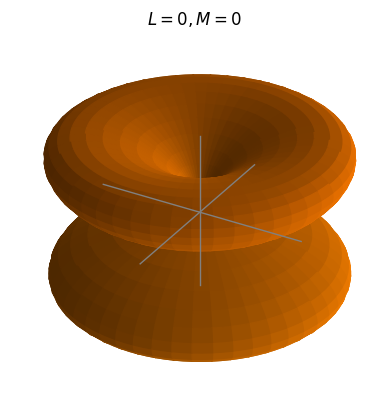

In [26]:
title = '$L=0, M=0$'
fig_name ='Nitrogen_3p_L0_M0.png'
compute_00_Y(0.01, 'autumn', title, fig_name)

Figure 2.12 – Spatial wave function of the ground state of the nitrogen atom with three p electrons (L=0, M=0)

#### Spatial wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=1, M=0)$

### Setting-up a dictionary of configuration arrays

#### Defining a function which computes the CG coefficients

In [27]:
T10 = {0: (1,1,  1,0,   2,1,  1,-1, 1,0),
       1: (1,0,  1,1,   2,1,  1,-1, 1,0),
       2: (1,1,  1,-1,  2,0,  1,0,  1,0),
       3: (1,-1, 1,1,   2,0,  1,0,  1,0),
       4: (1,1,  1,0,   1,1,  1,-1, 1,0),
       5: (1,0,  1,1,   1,1,  1,-1, 1,0),
       6: (1,-1, 1,0,   2,-1, 1,1,  1,0),
       7: (1,0,  1,-1,  2,-1, 1,1,  1,0),
       8: (1,-1, 1,0,   1,-1, 1,1,  1,0),
       9: (1,0,  1,-1,  1,-1, 1,1,  1,0),
       10:(1,1,  1,-1,  0,0,  1,0,  1,0)}

#### Computing and printing the CG coefficients

In [28]:
for k in range(0, len(T10)):
  s = 'CG' + str(k) +' = comp_CG(T10, ' + str(k) + ')'
  exec(s)

s10a = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit())]
print(s10a)

s10b = ["CG5: {}, CG6: {}, CG7: {}, CG8: {}, CG9: {}, CG10: {}".
     format(CG5.doit(), CG6.doit(), CG7.doit(), CG8.doit(), CG9.doit(), CG10.doit())]
print(s10b)

['CG0: sqrt(15)/10, CG1: sqrt(15)/10, CG2: -sqrt(15)/15, CG3: -sqrt(15)/15, CG4: 1/2']
['CG5: -1/2, CG6: sqrt(15)/10, CG7: sqrt(15)/10, CG8: 1/2, CG9: -1/2, CG10: sqrt(3)/3']


#### Computing the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=1, M=0)$

In [29]:
def compute_10_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y10b * Y1m1c
  Y_01 = float(CG1.doit()) * Y10a * Y11b * Y1m1c
  Y_02 = float(CG2.doit()) * Y11a * Y1m1b * Y10c
  Y_03 = float(CG3.doit()) * Y1m1a * Y11b * Y10c
  Y_04 = float(CG4.doit()) * Y11a * Y10b * Y1m1c
  Y_05 = float(CG5.doit()) * Y10a * Y11b * Y1m1c
  Y_06 = float(CG6.doit()) * Y1m1a * Y10b * Y11c
  Y_07 = float(CG7.doit()) * Y10a * Y1m1b * Y11c
  Y_08 = float(CG8.doit()) * Y1m1a * Y10b * Y11c
  Y_09 = float(CG9.doit()) * Y10a * Y1m1b * Y11c
  Y_10 = float(CG10.doit()) * Y11a * Y1m1b * Y10c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04 + Y_05 + Y_06 + Y_07 + Y_08 + Y_09 + Y_10
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()

  return

#### Displaying the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=1, M=0)$



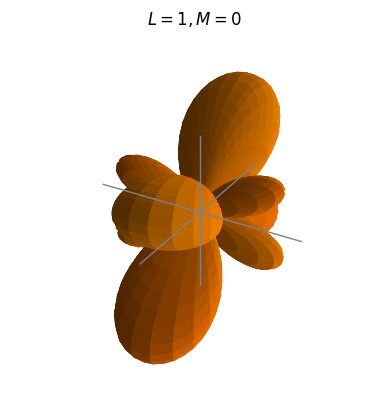

In [30]:
title = '$L=1, M=0$'
fig_name ='Nitrogen_3p_L1_M0.png'
compute_10_Y(0.030, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=2, M=0)$

#### Setting-up a dictionary of configuration arrays

In [31]:
T20 = {0: (1,1,  1,0,   2,1,  1,-1, 2,0),
       1: (1,0,  1,1,   2,1,  1,-1, 2,0),
       2: (1,0,  1,-1,  2,-1, 1,1,  2,0),
       3: (1,-1, 1,0,   2,-1, 1,1,  2,0),
       4: (1,0,  1,1,   1,1,  1,-1, 2,0),
       5: (1,1,  1,0,   1,1,  1,-1, 2,0),
       6: (1,-1, 1,0,   1,-1, 1,1,  2,0),
       7: (1,0,  1,-1,  1,-1, 1,1,  2,0),
       8: (1,1,  1,-1,  1,0,  1,0,  2,0),
       9: (1,-1, 1,1,   1,0,  1,0,  2,0)}

#### Computing and printing the CG coefficients

In [32]:
for k in range(0, len(T20)):
  s = 'CG' + str(k) +' = comp_CG(T20, ' + str(k) + ')'
  exec(s)

s20 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}, CG5: {}, CG6: {}, CG7: {}, CG8: {}, CG9: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit(), CG5.doit(), CG6.doit(), CG7.doit(), CG8.doit(), CG9.doit())]
print(s20)

['CG0: 1/2, CG1: 1/2, CG2: -1/2, CG3: -1/2, CG4: -sqrt(3)/6, CG5: sqrt(3)/6, CG6: -sqrt(3)/6, CG7: sqrt(3)/6, CG8: sqrt(3)/3, CG9: -sqrt(3)/3']


#### Computing the wave function of the excited state of nitrogen with three $p$ electrons $(L=2, M=0)$

In [33]:
def compute_20_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y10b * Y1m1c
  Y_01 = float(CG1.doit()) * Y10a * Y11b * Y1m1c
  Y_02 = float(CG2.doit()) * Y10a * Y1m1b * Y11c
  Y_03 = float(CG3.doit()) * Y1m1a * Y10b * Y11c
  Y_04 = float(CG4.doit()) * Y10a * Y11b * Y1m1c
  Y_05 = float(CG5.doit()) * Y11a * Y10b * Y1m1c
  Y_06 = float(CG6.doit()) * Y1m1a * Y10b * Y11c
  Y_07 = float(CG7.doit()) * Y10a * Y1m1b * Y11c
  Y_08 = float(CG8.doit()) * Y11a * Y1m1b * Y10c
  Y_09 = float(CG9.doit()) * Y1m1a * Y11b * Y10c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04 + Y_05 + Y_06 + Y_07 + Y_08 + Y_09
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=2, M=0)$



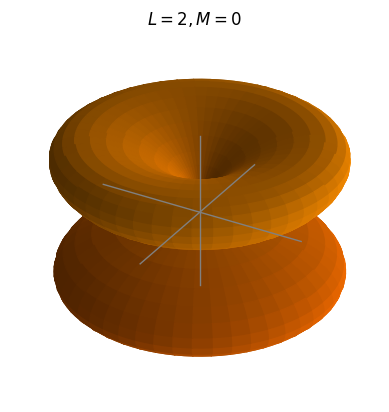

In [34]:
title = '$L=2, M=0$'
fig_name ='Nitrogen_3p_L2_M0.png'
compute_20_Y(0.04, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=3, M=0)$

#### Setting-up a dictionary of configuration arrays

In [35]:
T30 = {0: (1,1,  1,-1, 2,0,  1,0,  3,0),
       1: (1,0,  1,-1, 2,-1, 1,1,  3,0),
       2: (1,0,  1,1,  2,1,  1,-1, 3,0),
       3: (1,-1, 1,1,  2,0,  1,0,  3,0),
       4: (1,-1, 1,0,  2,-1, 1,1,  3,0),
       5: (1,1,  1,0,  2,1,  1,-1, 3,0)}

### Computing and printing the CG coefficients

In [36]:
for k in range(0, len(T30)):
  s = 'CG' + str(k) +' = comp_CG(T30, ' + str(k) + ')'
  exec(s)

s30 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}, CG5: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit(), CG5.doit())]
print(s30)

['CG0: sqrt(10)/10, CG1: sqrt(10)/10, CG2: sqrt(10)/10, CG3: sqrt(10)/10, CG4: sqrt(10)/10, CG5: sqrt(10)/10']


#### Computing the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=3, M=0)$

In [37]:
def compute_30_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y1m1b * Y10c
  Y_01 = float(CG1.doit()) * Y10a * Y1m1b * Y11c
  Y_02 = float(CG2.doit()) * Y10a * Y11b * Y1m1c
  Y_03 = float(CG3.doit()) * Y1m1a * Y11b * Y10c
  Y_04 = float(CG4.doit()) * Y1m1a * Y10b * Y11c
  Y_05 = float(CG5.doit()) * Y11a * Y10b * Y1m1c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04 + Y_05
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=3, M=0)$



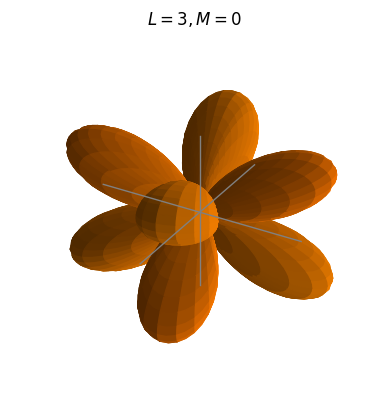

In [38]:
title = '$L=3, M=0$'
fig_name ='Nitrogen_3p_L3_M0.png'
compute_30_Y(0.02, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=1, M=1)$
$$\begin{array}{cccccc}
 & |l_1, m_{l_{1}}\rangle &|l_2, m_{l_{2}}\rangle &l_{12},m_{l_{12}}\rangle &l_{123}(L) &m_{l_{123}}(M) \\
0 &|1,1\rangle &|1,1\rangle &|2,2\rangle &|1,-1\rangle &|1,1\rangle \\
1 & |1,1\rangle &|1,0\rangle &|2,1\rangle &|1,0\rangle &|1,1\rangle \\
2 & |1,0\rangle &|1,0\rangle &|2,0\rangle &|1,1\rangle &|1,1\rangle \\
3 & |1,1\rangle &|1,-1\rangle &|2,0\rangle &|1,1\rangle &|1,1\rangle\\
4 & |1,-1\rangle &|1,1\rangle &|2,0\rangle &|1,1\rangle &|1,1\rangle\\
5 & |1,0\rangle &|1,1\rangle &|2,1\rangle &|1,0\rangle &|1,1\rangle\\
6 & |1,0\rangle &|1,1\rangle &|1,1\rangle &|1,0\rangle &|1,1\rangle\\
7 & |1,1\rangle &|1,0\rangle &|1,1\rangle &|1,0\rangle &|1,1\rangle\\
\end{array}$$


#### Setting-up a dictionary of configuration arrays

In [39]:
T11 = {0: (1,1,  1,1,   2,2,  1,-1, 1,1),
       1: (1,1,  1,0,   2,1,  1,0,  1,1),
       2: (1,0,  1,0,   2,0,  1,1,  1,1),
       3: (1,1,  1,-1,  2,0,  1,1,  1,1),
       4: (1,-1, 1,1,   2,0,  1,1,  1,1),
       5: (1,0,  1,1,   2,1,  1,0,  1,1),
       6: (1,0,  1,1,   1,1,  1,0,  1,1),
       7: (1,1,  1,0,   1,1,  1,0,  1,1)}

#### Computing and printing the CG coefficients

In [40]:
for k in range(0, len(T11)):
  s = 'CG' + str(k) +' = comp_CG(T11, ' + str(k) + ')'
  exec(s)

s11 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}, CG5: {}, CG6: {}, CG7: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit(), CG5.doit(), CG6.doit(), CG7.doit())]
print(s11)

['CG0: sqrt(15)/5, CG1: -sqrt(15)/10, CG2: sqrt(15)/15, CG3: sqrt(15)/30, CG4: sqrt(15)/30, CG5: -sqrt(15)/10, CG6: -1/2, CG7: 1/2']


#### Computing the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=1, M=1)$

In [41]:
def compute_11_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y11b * Y11c
  Y_01 = float(CG1.doit()) * Y10a * Y10b * Y11c
  Y_02 = float(CG2.doit()) * Y11a * Y10b * Y10c
  Y_03 = float(CG3.doit()) * Y11a * Y1m1b * Y11c
  Y_04 = float(CG4.doit()) * Y1m1a * Y11b * Y11c
  Y_05 = float(CG5.doit()) * Y10a * Y11b * Y10c
  Y_06 = float(CG6.doit()) * Y10a * Y11b * Y10c
  Y_07 = float(CG7.doit()) * Y11a * Y10b * Y10c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04 + Y_05 + Y_06 + Y_07
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=1, M=1)$



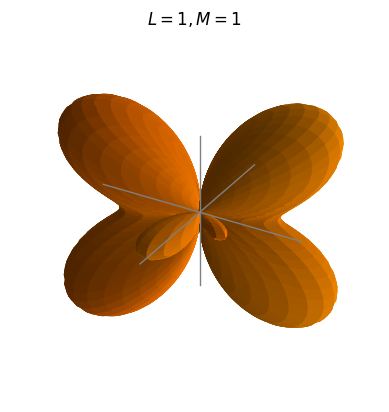

In [42]:
title = '$L=1, M=1$'
fig_name ='Nitrogen_3p_L1_M1.png'
compute_11_Y(0.035, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of nitrogen with three $p$ electrons $(L=2, M=1)$
$$\begin{array}{cccccc}
 & |l_1, m_{l_{1}}\rangle &|l_2, m_{l_{2}}\rangle &l_{12},m_{l_{12}}\rangle &l_{123}(L) &m_{l_{123}}(M) \\
0 &|1,1\rangle &|1,-1\rangle &|1,0\rangle &|1,1\rangle &|2,1\rangle \\
1 & |1,-1\rangle &|1,1\rangle &|1,0\rangle &|1,1\rangle &|2,1\rangle \\
2 & |1,1\rangle &|1,0\rangle &|1,1\rangle &|1,0\rangle &|2,1\rangle \\
3 & |1,0\rangle &|1,1\rangle &|1,1\rangle &|1,0\rangle &|2,1\rangle\\
4 & |1,1\rangle &|1,1\rangle &|2,2\rangle &|1,-1\rangle &|2,1\rangle\\
5 & |1,1\rangle &|1,-1\rangle &|2,0\rangle &|1,1\rangle &|2,1\rangle\\
6 & |1,-1\rangle &|1,1\rangle &|2,0\rangle &|1,1\rangle &|2,1\rangle\\
7 & |1,1\rangle &|1,0\rangle &|2,1\rangle &|1,0\rangle &|2,1\rangle\\
8 & |1,1\rangle &|1,1\rangle &|2,1\rangle &|1,0\rangle &|2,1\rangle\\
\end{array}$$

#### Setting-up a dictionary of configuration arrays
Each array contains $(l_1,m_{l_1}, l_2,m_{l_2},l_{12},m_{l_{12}}, l_3,m_{l_3}, l_{123}(L),m_{l_{123}}(M))$

In [43]:
T21 = {0: (1,1,  1,-1,  1,0,  1,1,  2,1),
       1: (1,-1, 1,1,   1,0,  1,1,  2,1),
       2: (1,1,  1,0,   1,1,  1,0,  2,1),
       3: (1,0,  1,1,   1,1,  1,0,  2,1),
       4: (1,1,  1,1,   2,2,  1,-1, 2,1),
       5: (1,1,  1,-1,  2,0,  1,1,  2,1),
       6: (1,-1, 1,1,   2,0,  1,1,  2,1),
       7: (1,1,  1,0,   2,1,  1,0,  2,1),
       8: (1,0,  1,1,   2,1,  1,0,  2,1)}

###" Computing and printing the CG coefficients

In [44]:
for k in range(0, len(T21)):
  s = 'CG' + str(k) +' = comp_CG(T21, ' + str(k) + ')'
  exec(s)

s21 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}, CG5: {}, CG6: {}, CG7: {}, CG8: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit(), CG5.doit(), CG6.doit(), CG7.doit(), CG8.doit())]
print(s21)

['CG0: 1/2, CG1: -1/2, CG2: 1/2, CG3: -1/2, CG4: sqrt(3)/3, CG5: -sqrt(3)/6, CG6: -sqrt(3)/6, CG7: sqrt(3)/6, CG8: sqrt(3)/6']


#### Computing the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=2, M=1)$

In [45]:
def compute_21_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y1m1b * Y11c
  Y_01 = float(CG1.doit()) * Y1m1a * Y11b * Y11c
  Y_02 = float(CG2.doit()) * Y11a * Y10b * Y10c
  Y_03 = float(CG3.doit()) * Y10a * Y11b * Y10c
  Y_04 = float(CG4.doit()) * Y11a * Y11b * Y1m1c
  Y_05 = float(CG5.doit()) * Y11a * Y1m1b * Y11c
  Y_06 = float(CG6.doit()) * Y1m1a * Y11b * Y11c
  Y_07 = float(CG7.doit()) * Y11a * Y10b * Y10c
  Y_08 = float(CG8.doit()) * Y10a * Y11b * Y10c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04 + Y_05 + Y_06 + Y_07 + Y_08
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=2, M=1)$



We assume that at least one electron has been excited to a different energy level.


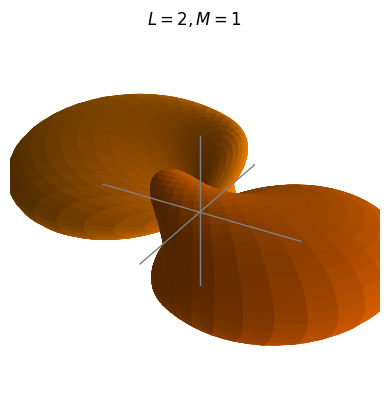

In [46]:
print("We assume that at least one electron has been excited to a different energy level.")
title = '$L=2, M=1$'
fig_name ='Nitrogen_3p_L2_M1.png'
compute_21_Y(0.035, 'autumn', title, fig_name)

## Spatial wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=3, M=1)$

#### Setting-up a dictionary of configuration arrays

In [47]:
T31 = {0: (1,1,  1,0,   2,1,  1,0,  3,1),
       1: (1,0,  1,1,   2,1,  1,0,  3,1),
       2: (1,1,  1,-1,  2,0,  1,1,  3,1),
       3: (1,-1, 1,1,   2,0,  1,1,  3,1),
       4: (1,1,  1,1,   2,2,  1,-1, 3,1)}

#### Computing and printing the CG coefficients

In [48]:
for k in range(0, len(T31)):
  s = 'CG' + str(k) +' = comp_CG(T31, ' + str(k) + ')'
  exec(s)

s31 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit())]
print(s31)

['CG0: 2*sqrt(15)/15, CG1: 2*sqrt(15)/15, CG2: sqrt(15)/15, CG3: sqrt(15)/15, CG4: sqrt(15)/15']


#### Defining a function which computes the wave function of states of the nitrogen with three $p$ electrons

In [49]:
def compute_31_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y10b * Y10c
  Y_01 = float(CG1.doit()) * Y10a * Y11b * Y10c
  Y_02 = float(CG2.doit()) * Y11a * Y1m1b * Y11c
  Y_03 = float(CG3.doit()) * Y1m1a * Y11b * Y11c
  Y_04 = float(CG4.doit()) * Y11a * Y11b * Y1m1c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=3, M=1)$



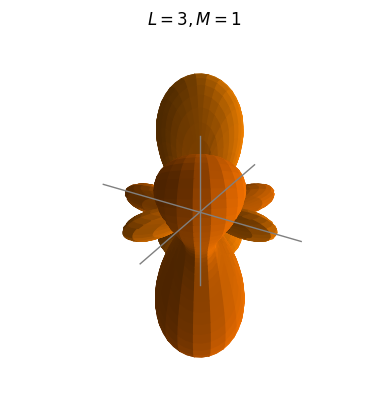

In [50]:
title = '$L=3, M=1$'
fig_name ='Nitrogen_3p_L3_M1.png'
compute_31_Y(0.03, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=2, M=2)$

#### Setting-up a dictionary of configuration arrays

In [51]:
T22 = {0: (1,1,  1,1,   2,2,  1,0,  2,2),
       1: (1,1,  1,0,   1,1,  1,1,  2,2),
       2: (1,0,  1,1,   1,1,  1,1,  2,2),
       3: (1,1,  1,0,   2,1,  1,1,  2,2),
       4: (1,0,  1,1,   2,1,  1,1,  2,2)}

#### Computing and printing the CG coefficients

In [52]:
for k in range(0, len(T22)):
  s = 'CG' + str(k) +' = comp_CG(T22, ' + str(k) + ')'
  exec(s)

s22 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit())]
print(s22)

['CG0: sqrt(6)/3, CG1: sqrt(2)/2, CG2: -sqrt(2)/2, CG3: -sqrt(6)/6, CG4: -sqrt(6)/6']


#### Defining a function which computes the wave function of states of the nitrogen atom with three $p$ electrons

In [53]:
def compute_22_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y11b * Y10c
  Y_01 = float(CG1.doit()) * Y11a * Y10b * Y11c
  Y_02 = float(CG2.doit()) * Y10a * Y11b * Y11c
  Y_03 = float(CG3.doit()) * Y11a * Y10b * Y11c
  Y_04 = float(CG4.doit()) * Y10a * Y11b * Y11c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=2, M=2)$



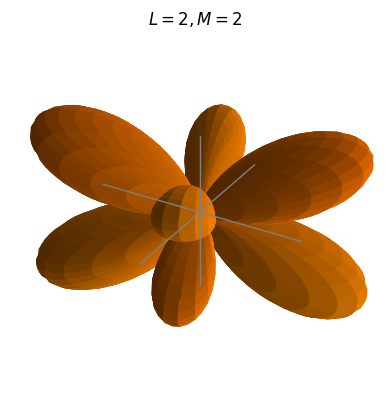

In [54]:
title = '$L=2, M=2$'
fig_name ='Nitrogen_3p_L2_M2.png'
compute_22_Y(0.025, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of nitrogen with three $p$ electrons $(L=3, M=2)$

#### Setting-up a dictionary of configuration arrays

In [55]:
T32 = {0: (1,1,  1,0,   2,1,  1,1,  3,2),
       1: (1,0,  1,1,   2,1,  1,1,  3,2),
       2: (1,1,  1,1,   2,2,  1,0,  3,2)}

#### Computing and printing the CG coefficients

In [56]:
for k in range(0, len(T32)):
  s = 'CG' + str(k) +' = comp_CG(T32, ' + str(k) + ')'
  exec(s)

s32 = ["CG0: {}, CG1: {}, CG2: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit())]
print(s32)

['CG0: sqrt(3)/3, CG1: sqrt(3)/3, CG2: sqrt(3)/3']


#### Defining a function which computes the wave function of states of the nitrogen atom with three $p$ electrons

In [57]:
def compute_32_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y10b * Y11c
  Y_01 = float(CG1.doit()) * Y10a * Y11b * Y11c
  Y_02 = float(CG2.doit()) * Y11a * Y11b * Y10c

  Y = Y_00 + Y_01 + Y_02
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=3, M=2)$



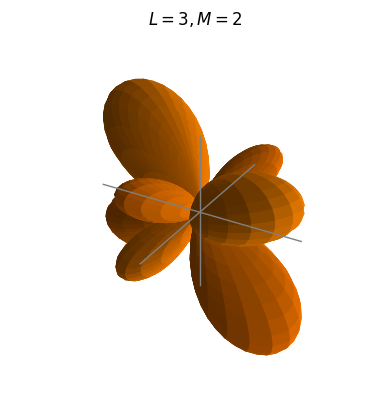

In [58]:
title = '$L=3, M=2$'
fig_name ='Nitrogen_3p_L3_M2.png'
compute_32_Y(0.02, 'autumn', title, fig_name)

#### Displaying the spatial wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=3, M=3)$

#### Setting-up a dictionary of configuration arrays

In [59]:
T33 = {0: (1,1,  1,1,   2,2,  1,1,  3,3)}

#### Computing and printing the CG coefficients

In [60]:
CG0 = comp_CG(T33, 0)

s33 = ["CG0: {}".format(CG0.doit())]
print(s33)

['CG0: 1']


#### Defining a function which computes the wave function of states of the nitrogen atom with three $p$ electrons

In [61]:
def compute_33_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y11b * Y11c

  Y = Y_00
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with three $p$ electrons $(L=3, M=3)$



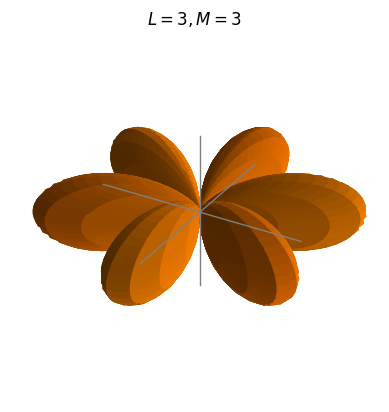

In [62]:
title = '$L=3, M=3$'
fig_name ='Nitrogen_3p_L3_M3.png'
compute_33_Y(0.02, 'autumn', title, fig_name)

## 2.1.3. General formulation of the Pauli exclusion principle

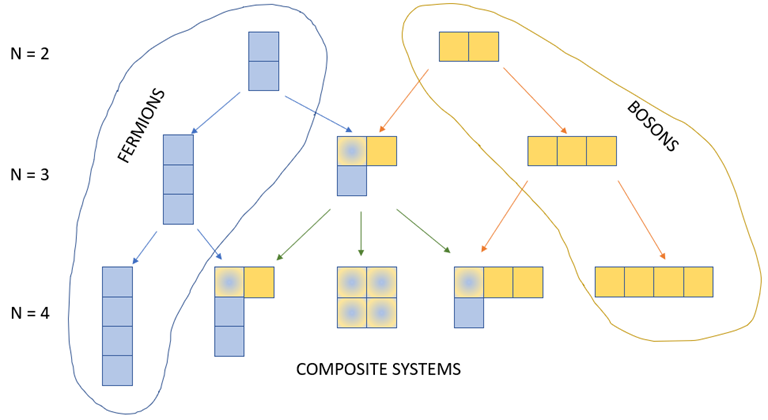

Figure 2.18 – Young frames for Fermions, Bosons and composite systems [authors]

In [63]:
def frame(mu):
  a = 0
  b = 0
  f = {}
  for k, v in mu.items():
    for c in range(v):
      f[a] = list(range(b+1, b+k+1))
      a += 1
      b += k
  return f

In [64]:
print("F_21_10 =", frame({2: 1, 1:0}))

F_21_10 = {0: [1, 2]}


In [65]:
print("F_21_11 =", frame({2: 1, 1:1}))

F_21_11 = {0: [1, 2], 1: [3]}


# 2.2. Postulate 2 – Probability amplitude

## 2.2.1. Computing the radial wavefunctions

In [66]:
a0 = 5.29177210903e-11

In [67]:
def comp_ak(n):
  n = max(n,1)
  # Create a dictionary with integer keys, starting with a0
  dict = {0: a0}
  for l in range (n-1):
    for k in range(n-l-1):
      ak = dict.get(k)
      #display("l: {}, k: {}, ak: {}".format(l, k, ak))
      dict[k+1] = ak*(k+l+1-n)/((k+1)*(k+2*l+2))
  return dict

In [68]:
d = comp_ak(10)
for k, v in d.items():
  print("{}, {}".format(k,v))

0, 5.29177210903e-11
1, -2.9398733939055554e-12
2, 1.9455044518492647e-13
3, -1.5749321753065475e-14
4, 1.615315051596459e-15
5, -2.2027023430860805e-16
6, 4.2830323337784895e-17
7, -1.3257004842647707e-17
8, 7.954202905588625e-18
9, -1.458270532691248e-17


Figure 2.19 – Coefficients that appear in the radial wave functions

In [69]:
from sympy.physics.hydrogen import R_nl
from sympy.abc import r, Z

In [70]:
R_nl(1, 0, r, Z)

2*sqrt(Z**3)*exp(-Z*r)

In [71]:
R_nl(2, 0, r, Z)

sqrt(2)*(-Z*r + 2)*sqrt(Z**3)*exp(-Z*r/2)/4

In [72]:
R_nl(2, 1, r, Z)

sqrt(6)*Z*r*sqrt(Z**3)*exp(-Z*r/2)/12

## 2.2.2. Probability amplitude for a hydrogen anion $(H^-)$

In [73]:
from sympy import symbols, integrate, exp, oo
x = symbols('x')
integrate(x**2 *exp(-2*x),(x,0,oo))

1/4

In [74]:
from sympy import symbols, sin, pi
x = symbols('x')
integrate(sin(x),(x,0,pi))

2

In [75]:
integrate(1,(x,0,2*pi))

2*pi

# 2.3. Postulate 3 – Measurable quantities and operators

## 2.3.1. Hermitian operator
### Writing matrices as a sum of outer products
## 2.3.2. Unitary operator
## 2.3.3. Density matrix and mixed quantum states
Figure 2.20 – Density matrix of pure and mixed quantum states

## 2.3.4. Position operation

## 2.3.5. Momentum operation

In [76]:
from sympy import symbols, sin, cos
x = symbols('x')
integrate(cos(x)*sin(x),(x,0,pi))

0

## 2.3.6. Kinetic Energy operation

## 2.3.7. Potential Energy operation

In [77]:
from sympy import symbols, integrate, exp, DiracDelta, oo
x, y = symbols('x y')
integrate(x**2 * exp(-2*x) * integrate(y**2 * exp(-2*y)*DiracDelta(x - y),(y,0,oo)),(x,0,oo))

3/128

In [78]:
from sympy import symbols, integrate, exp, DiracDelta, oo
x, y = symbols('x y')
integrate(x**2 * exp(-2*x) * integrate(DiracDelta(x - y),(y,0,oo)),(x,0,oo))

1/4

## 2.3.8. Total Energy operation

# 2.4. Postulate 4 – Time independent stationary states

# 2.5. Postulate 5 – Time evolution dynamics
## Schrödinger’s equation

# Questions

1.	What quantum numbers do the total wave function depend on?

In [79]:
#@title Enter your answer in lowercase or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "n, l, m_l, s, m_s"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


2. What is the Clebsch-Gordan coefficient if we couple together $l_1 = 0$ and $m_1 = 0$ and $l_2 = 1$, $m_2 = 0$ to $L=1, M=0$

In [80]:
#@title Enter your answer as an integer or 0 for a solution, then execute cell.
answer =  2#@param {type:"integer"}
solution = 1
if answer == solution:
  print("Correct")
elif answer == 0:
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


3. What happens to the total wave function upon application of an antisymmetric operation?

In [81]:
#@title Enter your answer in lowercase or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "-1"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


4. For a pure fermionic state, is the Young frame horizontal or vertical?

In [82]:
#@title Enter your answer in lowercase or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "vertical"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


5. What is the position operator for the Z direction? Is it $\hat{\boldsymbol{r}}_{j_{z}} \psi\left(\boldsymbol{r}_{1}, \ldots, \boldsymbol{r}_{N}\right)=\mathrm{z}_{j} \psi\left(\boldsymbol{r}_{1}, \ldots, \boldsymbol{r}_{N}\right)$ ?

In [83]:
#@title Enter your answer 'yes' or 'no' in lowercase or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "yes"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


6. What is the sum of potential and kinetic energy?

In [84]:
#@title Enter your answer in lowercase or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "total energy"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


Printing sorted dictionary of references.

# Summary of updates V3
This jupyter notebook has been updated to work with Qiskit 1.0.2 and Qiskit Nature 0.7.2.

Please refer to the following documentation:
- Qiskit 1.0 feature changes, https://docs.quantum.ibm.com/api/migration-guides/qiskit-1.0-features#qiskit-10-feature-changes
- Qiskit 1.0 migration tool, https://docs.quantum.ibm.com/api/migration-guides/qiskit-1.0-features#qiskit-10-migration-tool
- Qiskit Aer 0.14.0.1, Getting started, https://qiskit.github.io/qiskit-aer/getting_started.html
- Qiskit Nature 0.7.2, Qiskit Nature overview, https://qiskit-community.github.io/qiskit-nature/
- Qiskit Nature Migration Guides, https://qiskit-community.github.io/qiskit-nature/migration/index.html

## Changes in the text
### Removed dt in the integral on page 34
#### Previously
- Normalizable, meaning that a particle must exist in a volume $(\tau)$ and at a point in time, that is, it must exist somewhere in all space and time:  
$\int_{-\infty}^{\infty} \Psi_{\text {total }}^{\dagger}(\boldsymbol{r}, t) \Psi_{\text {total }}(\boldsymbol{r}, t) d\tau \ dt=1$,
where $d \tau=r^{2} \sin \theta \ dr \ d\theta \ d\varphi$, and

#### New
- Normalizable, meaning that a particle must exist in a volume $(\tau)$ and at a point in time, that is, it must exist somewhere in all space and time:  
$\int_{-\infty}^{\infty} \Psi_{\text {total }}^{\dagger}(\boldsymbol{r}, t) \Psi_{\text {total }}(\boldsymbol{r}, t) d\tau =1$,
where $d \tau=r^{2} \sin \theta \ dr \ d\theta \ d\varphi$, and

### Replaced "angular momentum" by "magnetic quantum number" in the text following figure Figure 2.4 page 36
#### Previously
The spherical harmonic functions, $Y_l^{m_l} (θ,φ)$, can be split into a product of three functions:

$Y_l^{m_l} (θ,φ)=A(l,m_l) P_l^{m_l} (cos⁡θ) S_{m_l} (φ)$,

where $A(l,m_l)$ is a constant that depends only on the quantum numbers ($l,m_l$),  $P_l^{m_l} (cos⁡θ)$ is a polar function, also known as the associated Legendre polynomial functions, which can be complex function depending on if the angular momentum (l) is positive or negative, and $S_{m_l}$ $(φ)=e^{im_l φ}$ is a complex exponential azimuthal function. 
#### New
The spherical harmonic functions, $Y_l^{m_l} (θ,φ)$, can be split into a product of three functions:

$Y_l^{m_l} (θ,φ)=A(l,m_l) P_l^{m_l} (cos⁡θ) S_{m_l} (φ)$,

where $A(l,m_l)$ is a constant that depends only on the quantum numbers ($l,m_l$),  $P_l^{m_l} (cos⁡θ)$ is a polar function, also known as the associated Legendre polynomial functions, which can be complex function depending on if the magnetic quantum number ($m_l$) is positive or negative, and $S_{m_l}$ $(φ)=e^{im_l φ}$ is a complex exponential azimuthal function. 

## Updates in install statements
Removed the following install statements:
```
pip install qiskit
pip install 'qiskit[visualization]'
```

## Updates in import statements
Removed the following import statement:
```
from qiskit.visualization import array_to_latex
```

## Updated in code
### Removed the escape character "\" in the title of the figures
For instance:

Previously
```
title = '$L=0,\ M=0$'
```
New
```
title = '$L=0, M=0$'
```